<a href="https://colab.research.google.com/github/choconutzy/Oceanography/blob/master/Oceanography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install library**

In [1]:
!pip install rasterio numpy pandas matplotlib xarray scipy netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.1 MB/s eta 0:00:00


In [2]:
!python -m pip install motuclient==1.8.4 --no-cache-dir

  Preparing metadata (setup.py) ... done
  Created wheel for motuclient: filename=motuclient-1.8.4-py3-none-any.whl size=32873 sha256=f9b6c7aaaba8340ff299383b15419dd8064a8910e8625a1e335fa6792297c878
  Stored in directory: /tmp/pip-ephem-wheel-cache-8w9v6qsw/wheels/46/74/d1/ee3216f52d83212f10a0a5f5b94f3d99cf3d29b8ecf09c60b6
Successfully built motuclient


## **Mount Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Import Library**

In [4]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import random
import os
import rasterio
from rasterio.transform import from_origin
from rasterio.enums import Resampling
from rasterio.windows import Window
from scipy.ndimage import zoom
import csv
from datetime import datetime, timedelta
import getpass

# **Download data**

In [5]:
# Copernicus Marine Credentials
USERNAME = input('Enter your username: ')
PASSWORD = getpass.getpass("Enter your password: ")

# Work directory
out_dir = f'/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/5_years'

# product and dataset IDs
serviceID = "GLOBAL_MULTIYEAR_PHY_001_030"
productID = "cmems_mod_glo_phy_my_0.083_P1M-m"

#coordinates
lon = (110.9 , 114.5)
lat = (-11.0 , -8.0)

# variable
var = "--variable mlotst"

# Boundary dates
start_date = datetime(2015, 1, 1, 12)
end_date = datetime(2020, 12, 31, 12)
motu_client = 'http://my.cmems-du.eu/motu-web/Motu'

# delta time
delta_t = timedelta(days=30)   # d+daydays to download by request

Enter your username: akhoirunnisa1
Enter your password: ··········


In [7]:
# Download loop
thirty_one = [1,3,5,7,8,10,12]
current_date = start_date
while current_date <= end_date:
    # Output filename
    out_name = f"SSS_{current_date}.nc"
    days=29
    if(current_date.month == 2):
      if(current_date.year % 4 == 0):
        days = 28
      else:
        days=27
    elif(thirty_one.count(current_date.month)>0):
      days = 30
    delta_t = timedelta(days=days)   # d+daydays to download by request
    max_date = current_date + delta_t
    # Motuclient command line
    query = f'python -m motuclient --motu {motu_client} \
    --service-id {serviceID}-TDS --product-id {productID} \
    --longitude-min {lon[0]} --longitude-max {lon[1]} --latitude-min {lat[0]} --latitude-max {lat[1]}\
    --date-min "{current_date}" --date-max "{max_date}" \
    --depth-min 0.49402499198913574 --depth-max 0.49402499198913574 \
    {var} \
    --out-dir {out_dir} --out-name {out_name} --user {USERNAME} --pwd {PASSWORD}'

    print(f"============== Running request on {current_date} ==============")
    print(query[:-30])

    # Run the command
    os.system(query)
    current_date+=timedelta(days=days+1)
print(f"============== Download completed! All files are in your directory {out_dir} ==============")

============== Running request on 2015-01-01 12:00:00 ==============
python -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu     --service-id GLOBAL_MULTIYEAR_PHY_001_030-TDS --product-id cmems_mod_glo_phy_my_0.083_P1M-m     --longitude-min 110.9 --longitude-max 114.5 --latitude-min -11.0 --latitude-max -8.0    --date-min "2015-01-01 12:00:00" --date-max "2015-01-31 12:00:00"     --depth-min 0.49402499198913574 --depth-max 0.49402499198913574     --variable mlotst     --out-dir /content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/5_years --out-name SSS_2015-01-01 12:00:00.nc --user akhoi
============== Running request on 2015-02-01 12:00:00 ==============
python -m motuclient --motu http://my.cmems-du.eu/motu-web/Motu     --service-id GLOBAL_MULTIYEAR_PHY_001_030-TDS --product-id cmems_mod_glo_phy_my_0.083_P1M-m     --longitude-min 110.9 --longitude-max 114.5 --latitude-min -11.0 --latitude-max -8.0    --date-min "2015-02-01 12:00:00" --date-max "2015-02-28 12:00:00"     --depth

# **Ekstrak value from NC**

In [ ]:
parameter = "MLD"
folder_path = f'/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/{parameter}/5_years'
# Open the netCDF file
# Access the SST variable (assuming it is named 'sst' in the file)
# Iterate over files in the folder
col_param = {
    "SST" : "sst",
    "CHL" : "chlor_a",
    "SSS" : "so",
    "MLD": "mlotst"
}
data = {
    "month": ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"],
    "2015" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2016" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2017" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2018" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2019" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2020" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
}
result = {
    "musim": ["Musim Barat", "Musim Peralihan 1", "Musim Timur", "Musim Peralihan 2"],
    "mean": [0.0,0.0,0.0,0.0],
    "max": [0.0,0.0,0.0,0.0],
    "min": [0.0,0.0,0.0,0.0],
}
seasons = {
    "Musim Barat": ["01", "02", "12"],
    "Musim Peralihan 1": ["03", "04", "05"],
    "Musim Timur": ["06", "07", "08"],
    "Musim Peralihan 2": ["09", "10", "11"]
}
points = {
    "lon": [],
    "lat": [],
    "value": []
}
data = pd.DataFrame(data)
result = pd.DataFrame(result)
points = pd.DataFrame(points)
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a regular file
    if os.path.isfile(file_path):
        # Perform operations on the file
        dataset = xr.open_dataset(file_path)
        lon_min = 110.90
        lon_max = 114.50
        lat_min = -8.00
        lat_max = -11.00
        fname = ""
        month, year = "", ""
        selected_data = dataset
        if(parameter=='SSS' or parameter== 'MLD'):
          fname = file_name.split("_")[1]
          month, year = fname[5:7], fname[:4]
          selected_data = dataset.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_max, lat_min))
        else:
          selected_data = dataset.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
        if(parameter=='CHL'):
          fname = file_name.split(".")[1]
          month, year = fname[4:6], fname[:4]
          selected_data = selected_data.where(selected_data['chlor_a'] <=2.8, drop=True)
        # points = points.loc[data["lon"] == month, f'{year}_min'] = min
        mean = selected_data[col_param[parameter]].mean().values
        if(mean == 0.0):
          print(selected_data)
        # print(mean)
        # fname = file_name.split(".")[1].split("_")[0]
        data.loc[data["month"] == month, year] = mean
print((data))
pd.DataFrame(data).to_csv(path_or_buf=f'/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/{parameter}/5_years/result/5_years.csv')

   month       2015       2016       2017       2018       2019       2020
0     01  21.878918  13.937075  25.895962  21.464832  17.975101  14.543119
1     02  13.572411  12.247093  22.903809  17.290001  13.081649  16.031412
2     03  17.343102  11.643212  15.255470  11.941801  12.659883  13.874892
3     04  13.354607  14.130222  14.548743  12.913375  13.499953  14.186458
4     05  19.364223  17.178072  18.596933  19.834436  22.429268  20.578909
5     06  27.969534  25.458410  19.916302  23.050777  17.453842  27.429785
6     07  23.576254  26.712458  20.420799  19.432571  22.137060  26.576303
7     08  19.669622  24.784447  16.817408  18.806517  16.585653  17.913675
8     09  14.797260  17.502724  13.068130  13.946376  15.237518  13.937183
9     10  13.565057  14.790555  12.762513  11.781422  11.356736  14.329103
10    11  11.948937  14.074094  11.661488  12.910779  11.536149  12.679350
11    12  15.156302  25.044428  17.312605  18.272717  11.028949  18.948620


   month variable        mld       chl
0      1     2015  21.878918  0.107372
1      2     2015  13.572411  0.122851
2      3     2015  17.343102  0.136430
3      4     2015  13.354607  0.184274
4      5     2015  19.364223  0.275742
..   ...      ...        ...       ...
67     8     2020  17.913675  0.546814
68     9     2020  13.937183  0.500893
69    10     2020  14.329103  0.452460
70    11     2020  12.679350  0.136398
71    12     2020  18.948620  0.124561

[72 rows x 4 columns]


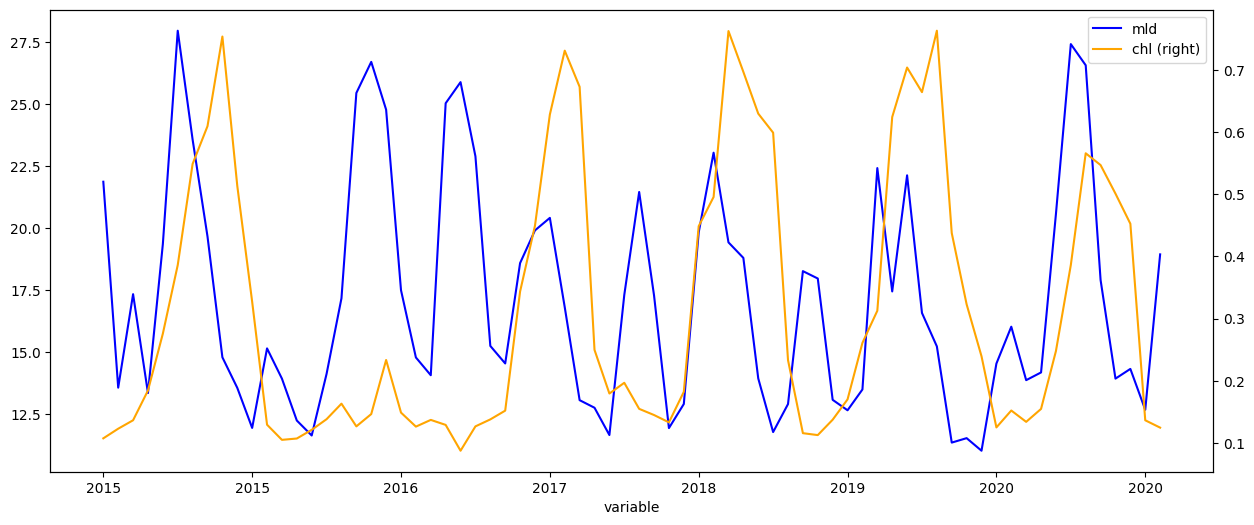

In [ ]:
mld = pd.read_csv('/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/5_years/result/5_years.csv')
chl = pd.read_csv('/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/CHL/5_years/result/5_years.csv')
mld = mld.drop('Unnamed: 0', axis=1)
chl = chl.drop('Unnamed: 0', axis=1)
chl = chl.drop('2021', axis=1)
chl = chl.drop('2022', axis=1)
mld['month'] = mld['month'].astype(str)
chl['month'] = chl['month'].astype(str)
month = pd.array(mld['month'])

unpivoted_mld = pd.melt(mld, id_vars=['month'], value_vars=['2015', '2016', '2017', '2018', '2019', '2020'], value_name='mld')
unpivoted_chl = pd.melt(chl, id_vars=['month'], value_vars=['2015', '2016', '2017', '2018', '2019', '2020'], value_name='chl')

data = pd.merge(unpivoted_mld, unpivoted_chl)
# data.set_index('variable', append=True).swaplevel(0,1)
data.set_index('variable')
# Create the figure and axes object
fig, ax = plt.subplots(figsize=(15,6))
print(data)
# Plot the first x and y axes:
data.set_index('variable').plot(
    use_index=True,
    y='mld',
    ax=ax,
    color='blue'
)
# Plot the second x and y axes.
# By secondary_y = True a second y-axis is requested
data.set_index('variable').plot(
    use_index=True,
    y='chl',
    ax=ax,
    secondary_y=True,
    color='orange'
)
plt.show()

# **Global Variable**

In [ ]:
parameters = ['SST', 'CHL', 'SSS', 'MLD']
src_path = "/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/"
months = [1,2,3,4,5,6,7,8,9,10,11,12]

# **NC to txt**

In [ ]:
import netCDF4

folder_path = "/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/nc_file/"

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a regular file
    if os.path.isfile(file_path):
      # Open the NetCDF file
      nc_file = netCDF4.Dataset(file_path, 'r')
      fname = file_name.split('.')[1].split('_')[0][:6]
      # Open the output text file in write mode
      txt_file = open(f'/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/txt_area/{fname}.txt', 'w')


      # Get the chlorophyll variable from the NetCDF file
      chlor_variable = nc_file.variables['chlor_a']

      # Get the latitude and longitude variables
      lat_variable = nc_file.variables['lat']
      lon_variable = nc_file.variables['lon']

      # Iterate over each latitude and longitude
      for lat in range(len(lat_variable)):
          for lon in range(len(lon_variable)):
              if lat>=8.00 and lat<=11.00 and lon>=110.90 and lon<=114.5:
                # Write the longitude, latitude, and chlorophyll value to the text file
                # Get the chlorophyll value
                chlor_value = chlor_variable[lat, lon]

                # Get the latitude and longitude values
                if(chlor_value != ' --'):
                  latitude = lat_variable[lat]
                  longitude = lon_variable[lon]
                  txt_file.write(f"{longitude}, {latitude}, {chlor_value}\n")

      # Close the NetCDF file
      nc_file.close()

      # Close the text file
      txt_file.close()

print("Extraction complete.")

FileNotFoundError: ignored

# **Split to per month**

In [ ]:
# Membaca file CSV
data = pd.read_csv('/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/skipjack/pondap/cleaned/coordinate_map_area_jatim.csv', sep=";")
# Memisahkan data berdasarkan bulan dan menyimpannya ke file terpisah

for year in range(2021,2023):
  for month in months:
    new_data = data[data['bulan'] == month]
    new_data = new_data[new_data['tahun'] == year]
    if(new_data['bulan'].count() > 0):
      month = f'0{month}' if month < 10 else str(month)
      data['SST'], data['CHL'], data['SSS'], data['MLD'] = np.nan, np.nan, np.nan, np.nan
      file_name = f'{year}_{month}.csv'
      new_data.to_csv(f'{src_path}/skipjack/pondap/jatim_area/{file_name}', index=False)

In [ ]:
src_path = "/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/"

n = 3
while n < 4:
  variable = parameters[n]
  folder_path = src_path + variable + '/'
  # Iterate over files in the folder
  for file_name in os.listdir(folder_path):
      file_path = os.path.join(folder_path, file_name)
      year, month = file_name[:4], file_name[4:6]
      # Check if the file is a regular file
      if os.path.isfile(file_path) :
          # Perform operations on the file
          # Read the coordinate data from the CSV file
          coordinate_file_path = src_path+'skipjack/pondap/jatim_area/'+year+'_'+month+'.csv'
          if os.path.isfile(coordinate_file_path):
            # Open the SST TIFF file
            dataset = rasterio.open(file_path)
            coordinates_file = pd.read_csv(coordinate_file_path)
            columns = ['date','month', 'year','x','y','trip','fish','cpue', variable]
            # Create an empty list to store the SST values at the coordinates
            df = pd.DataFrame(columns=columns)
            # Iterate over the coordinates and extract the corresponding variable values
            for _, row in coordinates_file.iterrows():
                date, month, year, x, y, trip, fish, cpue = row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7]
                # Convert x, y coordinates to pixel coordinates
                px, py = dataset.index(x, y)
                # print(type(x),type(y),param_value)
                # Read the SST value at the pixel coordinates
                param_value = dataset.read(1, window=((py, py + 1), (px, px + 1)))
                # Append the var value to the list
                new_param_value = []
                if len(param_value)>0 and len(param_value[0])>0:
                  new_param_value = pd.DataFrame([[date, month, year,x,y,trip,fish, cpue,param_value[0][0]]], columns=columns)
                else:
                  new_param_value = pd.DataFrame([[date, month, year,x,y,trip,fish, cpue, float('NaN')]], columns=columns)
                df = pd.concat([df, new_param_value], ignore_index=True)


            # Print the var values
            coordinates_file[variable] = df[variable]
            # Save to csv
            coordinates_file.to_csv(coordinate_file_path, index=False)
            # Close the dataset
            dataset.close()
  n += 1

/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202101_reprojected.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202103_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202105_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202102_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202107_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202111_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202108_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202207_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202212_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202110_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202205_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202204_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/MLD/202208_termoklin.tif
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/M

# **NC to Geotif**

In [ ]:
folder_path = "/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/monthly/"

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a regular file
    if os.path.isfile(file_path):
        # Perform operations on the file
        # Open the SST TIFF file
        nc_path = file_path
        file_name = nc_path.split(folder_path)[1]
        # Baca file .nc menggunakan xarray
        dataset = xr.open_dataset(nc_path)
        # Dapatkan data variabel yang ingin diubah ke TIFF
        data_variable = dataset['sst']
        print(data_variable)

        # Dapatkan informasi spasial (koordinat, proyeksi) dari dataset
        lon = dataset['lon']
        lat = dataset['lat']
        # transform = from_origin(lon[0], lat[0], lon[1] - lon[0], lat[1] - lat[0])  # Transformasi untuk piksel

        # # Konversi data menjadi array numpy
        # data_array = data_variable.values
        # # Simpan sebagai file TIFF menggunakan rasterio
        # new_file_path = '/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/monthly/geotif/' + file_name.split('.')[1][:6] + '_reprojected.tif'
        # with rasterio.open(new_file_path, 'w', driver='GTiff', height=data_array.shape[0],
        #                   width=data_array.shape[1], count=1, dtype=data_array.dtype,
        #                   crs='+proj=latlong', transform=transform) as dst:
        #     dst.write(data_array, 1)


<xarray.DataArray 'sst' (lat: 135, lon: 144)>
[19440 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -7.8 -7.841 -7.883 -7.925 ... -13.29 -13.33 -13.37
  * lon      (lon) float32 109.0 109.1 109.1 109.2 ... 114.9 114.9 115.0 115.0
Attributes:
    long_name:      Sea Surface Temperature
    units:          degree_C
    standard_name:  sea_surface_temperature
    valid_min:      -1000
    valid_max:      10000
    display_scale:  linear
    display_min:    -2.0
    display_max:    45.0
<xarray.DataArray 'sst' (lat: 135, lon: 144)>
[19440 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -7.8 -7.841 -7.883 -7.925 ... -13.29 -13.33 -13.37
  * lon      (lon) float32 109.0 109.1 109.1 109.2 ... 114.9 114.9 115.0 115.0
Attributes:
    long_name:      Sea Surface Temperature
    units:          degree_C
    standard_name:  sea_surface_temperature
    valid_min:      -1000
    valid_max:      10000
    display_scale:  linear
    display_min:    -2.0
    displ

In [ ]:
folder_path = "/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/CHL/"

for year in range(2021, 2023):
  month = 1
  while month < 12:
    seasons = {1: 'DJF', 3:'MAM', 6:'JJA', 9:'SON'}
    season = seasons.get(month)
    months = [month, month+1, ('12' if(month+2==3) else month+2)]
    mm = lambda a : '0'+(str(a))

    for i,m in enumerate(months):
      if int(m)<10:
       months[i]=mm(m)
      else:
        months[i]=str(m)
    def openRasterFile(n):
      return rasterio.open(folder_path+str(year)+months[n]+'_reprojected.tif')
    # Open the input raster files
    src1, src2, src3 = openRasterFile(0), openRasterFile(1), openRasterFile(2)
    # Read the raster data as arrays
    data1, data2, data3 = src1.read(1), src2.read(1), src3.read(1)

    # Perform the raster calculation
    result = ( data1 + data2 + data3 )/3
    # Drop nan
    # result[np.isnan(result)] = 0
    # Create output raster file using the metadata from the first input raster
    profile = src1.profile
    with rasterio.open('/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/CHL/seasonal/'+str(season)+'_'+str(year)+'.tif', 'w', **profile) as dst:
        # Write the calculated result to the output raster
        dst.write(result, 1)
    month += (2 if(month+2==3) else 3)


## **Extract Value To Point & Boxplot**

In [ ]:
variable=parameters[0]
folder_path = "/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/"+variable+"/seasonal/"
params = {
    "SST": "Suhu Permukaan Laut (oC)",
    "CHL": "Klorofil ()",
    "SSS": "Salinitas Permukaan Laut ()",
    "MLD": "MLD",
}
data = {
    "DJF": "",
    "JJA" : "",
    "MAM" : "",
    "SON" : "",
}
data_seasonal = []

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a regular file
    if os.path.isfile(file_path):
        # Perform operations on the file
        # Open the SST TIFF file
        sst_tiff_file = file_path
        dataset = rasterio.open(sst_tiff_file)

        # Read the SST data
        sst_data = dataset.read(1)  # Assuming the temperature data is in the first band (band index 1)

        # Get the geospatial transform and convert it to pixel coordinates
        transform = dataset.transform
        rows, cols = np.indices(sst_data.shape)
        px, py = transform * (cols, rows)

        # Convert pixel coordinates to geographic coordinates
        gx, gy = dataset.xy(py.flatten(), px.flatten())

        # Create points with SST values
        sst_rtopoint = [[x,y,sst] for x, y, sst in zip(gx, gy, sst_data.flatten()) if sst>0]

        sst_rtopoint = pd.DataFrame(data= sst_rtopoint, columns=['x', 'y', 'sst'])
        fname = file_name.split('.')[0]
        data_seasonal.append([fname, sst_rtopoint['sst'].max(), sst_rtopoint['sst'].min(), sst_rtopoint['sst'].mean()])
        data[fname] = sst_rtopoint['sst']

result_rtopoint = pd.DataFrame(data).dropna()

print(result_rtopoint)
# result_rtopoint.to_csv(path_or_buf='/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/result/result_sst_rtopoint.csv')
summary_rtopoint = pd.DataFrame(data=data_seasonal, columns=['Musim', 'Maximum', 'Minimum', 'Rata-rata'])
summary_rtopoint.to_csv(path_or_buf='/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/result/summary_sst_rtopoint.csv')

print(summary_rtopoint)

# Close the dataset
dataset.close()


      DJF JJA MAM SON   djf_2021   djf_2022   son_2022   mam_2021   son_2021  \
0                      29.459999  30.039999  27.726667  29.750000  28.548334   
1                      29.871666  30.053335  27.936666  29.893332  28.336664   
2                      29.350000  29.980001  27.834999  29.921667  28.218332   
3                      29.550001  30.111664  27.631666  29.863333  28.188334   
4                      29.616667  30.223333  28.048332  29.814997  28.093332   
...    ..  ..  ..  ..        ...        ...        ...        ...        ...   
31383                  30.991667  29.511665  26.411667  29.529999  28.731667   
31384                  30.861666  29.626665  26.463333  29.503332  28.721666   
31385                  30.936666  29.686666  26.433334  29.488333  28.824999   
31386                  30.996666  29.689997  26.421667  29.469999  28.903330   
31387                  30.961664  29.715002  26.474998  29.438334  28.815001   

        jja_2021   mam_2022   jja_2022 

In [ ]:
variable=parameters[0]
folder_path = "/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/monthly"
params = {
    "SST": "Suhu Permukaan Laut (oC)",
    "CHL": "Klorofil ()",
    "SSS": "Salinitas Permukaan Laut ()",
    "TRMKLN": "Termoklin (mdpl)",
}
data = {}
data_seasonal = []

# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a regular file
    if os.path.isfile(file_path):
        # Perform operations on the file
        # Open the SST TIFF file
        sst_tiff_file = file_path
        dataset = rasterio.open(sst_tiff_file)

        # Read the SST data
        sst_data = dataset.read(1)  # Assuming the temperature data is in the first band (band index 1)

        # Get the geospatial transform and convert it to pixel coordinates
        transform = dataset.transform
        rows, cols = np.indices(sst_data.shape)
        px, py = transform * (cols, rows)

        # Convert pixel coordinates to geographic coordinates
        gx, gy = dataset.xy(py.flatten(), px.flatten())

        # Create points with SST values
        sst_rtopoint = [[x,y,sst] for x, y, sst in zip(gx, gy, sst_data.flatten()) if sst>0]

        sst_rtopoint = pd.DataFrame(data= sst_rtopoint, columns=['x', 'y', 'sst'])
        fname = file_name.split('.')[0]
        data_seasonal.append([fname, sst_rtopoint['sst'].max(), sst_rtopoint['sst'].min(), sst_rtopoint['sst'].mean()])
        data[fname] = sst_rtopoint['sst']

result_rtopoint = pd.DataFrame(data).dropna().sample(n=300, random_state=1)

print(result_rtopoint)
# result_rtopoint.to_csv(path_or_buf='/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/result/result_sst_rtopoint.csv')
# summary_rtopoint.to_csv(path_or_buf='/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/result/summary_sst_rtopoint.csv')
# Create a boxplot from the DataFrame


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


IndexError: ignored

# **Ekstrak value from NC**

In [ ]:
import netCDF4

# Open the SST file
nc_file = netCDF4.Dataset('path_to_sst_file.nc')

# Read the SST data variable
sst_data = nc_file.variables['sst']

# Read the latitude and longitude coordinates
latitudes = nc_file.variables['lat'][:]
longitudes = nc_file.variables['lon'][:]

# Extract values for all coordinates
sst_values = sst_data[:]

# Close the netCDF file
nc_file.close()

# Print all coordinates and their corresponding values
for lat_index in range(len(latitudes)):
    for lon_index in range(len(longitudes)):
        latitude = latitudes[lat_index]
        longitude = longitudes[lon_index]
        sst_value = sst_values[:, lat_index, lon_index]
        print("Coordinate: ({}°N, {}°E) - SST Value: {}".format(latitude, longitude, sst_value))


In [ ]:
parameter = parameters[3]
folder_path = f'/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/{parameter}/monthly'
# Open the netCDF file
data = pd.DataFrame(data)
result = pd.DataFrame(result)
points = pd.DataFrame(points)
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a regular file
    if os.path.isfile(file_path):
        # Perform operations on the file
        dataset = xr.open_dataset(file_path)
        lon_min = 110.90
        lon_max = 114.50
        lat_min = -8.00
        lat_max = -11.00
        fname = file_name.split(".")[1]
        selected_data = dataset
        if(parameter=='SSS' or parameter== 'MLD'):
          fname = file_name.split(".")[0]
          selected_data = dataset.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_max, lat_min))
        else:
          selected_data = dataset.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
        if(parameter=='CHL'):
          selected_data = selected_data.where(selected_data['chlor_a'] <= 2.8, drop=True)
        month, year = fname[4:6], fname[:4]

In [ ]:
parameter = parameters[3]
folder_path = f'/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/{parameter}/monthly'
# Open the netCDF file
# Access the SST variable (assuming it is named 'sst' in the file)
# Iterate over files in the folder
col_param = {
    "SST" : "sst",
    "CHL" : "chlor_a",
    "SSS" : "so",
    "MLD": "mlotst"
}
data = {
    "month": ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"],
    "2021_min": [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2021_max": [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2021" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2022_min": [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2022_max": [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2022" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
}
result = {
    "musim": ["Musim Barat", "Musim Peralihan 1", "Musim Timur", "Musim Peralihan 2"],
    "mean": [0.0,0.0,0.0,0.0],
    "max": [0.0,0.0,0.0,0.0],
    "min": [0.0,0.0,0.0,0.0],
}
seasons = {
    "Musim Barat": ["01", "02", "12"],
    "Musim Peralihan 1": ["03", "04", "05"],
    "Musim Timur": ["06", "07", "08"],
    "Musim Peralihan 2": ["09", "10", "11"]
}
points = {
    "lon": [],
    "lat": [],
    "value": []
}
data = pd.DataFrame(data)
result = pd.DataFrame(result)
points = pd.DataFrame(points)
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a regular file
    if os.path.isfile(file_path):
        # Perform operations on the file
        dataset = xr.open_dataset(file_path)
        lon_min = 110.90
        lon_max = 114.50
        lat_min = -8.00
        lat_max = -11.00
        fname = file_name.split(".")[1]
        selected_data = dataset
        if(parameter=='SSS' or parameter== 'MLD'):
          fname = file_name.split(".")[0]
          selected_data = dataset.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_max, lat_min))
        else:
          selected_data = dataset.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
        if(parameter=='CHL'):
          selected_data = selected_data.where(selected_data['chlor_a'] <= 2.8, drop=True)
        month, year = fname[4:6], fname[:4]
        # points = points.loc[data["lon"] == month, f'{year}_min'] = min
        mean = selected_data[col_param[parameter]].mean().values
        min, max = selected_data[col_param[parameter]].min().values, selected_data[col_param[parameter]].max().values
        fname = file_name.split(".")[1].split("_")[0]
        data.loc[data["month"] == month, f'{year}_min'] = min
        data.loc[data["month"] == month, f'{year}_max'] = max
        data.loc[data["month"] == month, year] = mean
print((data))
pd.DataFrame(data).to_csv(path_or_buf=f'/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/result/{parameter}/monthly_mean_max_min_{parameter}.csv')
for season in result["musim"]:
  range_min = []
  range_max = []
  sum = 0.0
  for month in seasons[season]:
    range_min.append(data.loc[data["month"] == month, '2021_min'].values[0])
    range_min.append(data.loc[data["month"] == month, '2022_min'].values[0])
    range_max.append(data.loc[data["month"] == month, '2021_max'].values[0])
    range_max.append(data.loc[data["month"] == month, '2022_max'].values[0])
    sum = sum + (data.loc[data["month"] == month, "2021"].values[0])
    sum = sum + (data.loc[data["month"] == month, "2022"].values[0])
  result.loc[result["musim"] == season, "mean"] = sum/6
  result.loc[result["musim"] == season, "max"] = np.array(range_max).max()
  result.loc[result["musim"] == season, "min"] = np.array(range_min).min()
print(result)
pd.DataFrame(result).to_csv(path_or_buf=f'/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data//result/{parameter}/seasonal_mean_max_min_{parameter}.csv')

   month  2021_min   2021_max       2021  2022_min   2022_max       2022
0     01  7.651778  37.936264  20.225767  7.763976  32.327969  22.450092
1     02  7.760653  30.117979  20.096434  7.804028  45.156948  22.095381
2     03  7.809358  19.264044  15.263180  7.813931  21.421497  14.568870
3     04  7.908119  24.627047  16.194265  7.839863  23.882946  13.572960
4     05  7.831394  41.661228  18.528442  7.836040  22.059340  17.620537
5     06  7.983814  23.640621  18.942406  7.970363  37.103874  25.303591
6     07  7.831702  39.743896  27.082203  7.853064  46.274334  28.346371
7     08  7.870514  45.756653  23.403543  7.854241  45.671577  21.586443
8     09  7.839409  46.287586  17.668831  8.139283  38.238914  19.140867
9     10  7.827983  43.979576  14.510004  7.809528  30.265629  15.523254
10    11  7.856562  24.620272  12.452353  7.803630  23.504686  13.447652
11    12  7.763976  32.327969  18.551479  7.738393  23.796638  17.416445
               musim       mean        max       mi

In [ ]:
parameter = parameters[1]
folder_path = f'/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/{parameter}/5_years'
# Open the netCDF file
# Access the SST variable (assuming it is named 'sst' in the file)
# Iterate over files in the folder
col_param = {
    "SST" : "sst",
    "CHL" : "chlor_a",
    "SSS" : "so",
    "MLD": "mlotst"
}
data = {
    "month": ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"],
    "2017" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2018" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2019" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2020" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2021" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
    "2022" : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
}
# result = {
#     "musim": ["Musim Barat", "Musim Peralihan 1", "Musim Timur", "Musim Peralihan 2"],
#     "mean": [0.0,0.0,0.0,0.0],
#     "max": [0.0,0.0,0.0,0.0],
#     "min": [0.0,0.0,0.0,0.0],
# }
# seasons = {
#     "Musim Barat": ["01", "02", "12"],
#     "Musim Peralihan 1": ["03", "04", "05"],
#     "Musim Timur": ["06", "07", "08"],
#     "Musim Peralihan 2": ["09", "10", "11"]
# }
points = {
    "lon": [],
    "lat": [],
    "value": []
}
data = pd.DataFrame(data)
result = pd.DataFrame(result)
points = pd.DataFrame(points)
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is a regular file
    if os.path.isfile(file_path):
        # Perform operations on the file
        dataset = xr.open_dataset(file_path)
        lon_min = 110.90
        lon_max = 114.50
        lat_min = -8.00
        lat_max = -11.00
        fname = file_name.split(".")[1]
        selected_data = dataset
        if(parameter=='SSS' or parameter== 'MLD'):
          fname = file_name.split(".")[0]
          selected_data = dataset.sel(longitude=slice(lon_min, lon_max), latitude=slice(lat_max, lat_min))
        else:
          selected_data = dataset.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
        if(parameter=='CHL'):
          selected_data = selected_data.where(selected_data['chlor_a'] <= 2.8, drop=True)
        month, year = fname[4:6], fname[:4]
        # points = points.loc[data["lon"] == month, f'{year}_min'] = min
        mean = selected_data[col_param[parameter]].mean().values
        min, max = selected_data[col_param[parameter]].min().values, selected_data[col_param[parameter]].max().values
        fname = file_name.split(".")[1].split("_")[0]
        data.loc[data["month"] == month, f'{year}_min'] = min
        data.loc[data["month"] == month, f'{year}_max'] = max
        data.loc[data["month"] == month, year] = mean
print((data))
pd.DataFrame(data).to_csv(path_or_buf=f'/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/result/{parameter}/monthly_5years_{parameter}.csv')

# **Change value**

In [ ]:
# This code just used if the y coordinates still wrong value
folder_path = src_path + 'skipjack/'
# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    year, month = file_name[:4], file_name[5:7]
    # Check if the file is a regular file
    if os.path.isfile(file_path):
        # Perform operations on the file
        df = pd.read_csv(file_path, sep=',')
        # if df['y'][0]>0 : df['y']=df['y']*-1
        df['SST'], df['CHL'], df['SSS'], df['TRMKLN'] = np.nan, np.nan, np.nan, np.nan
        print(df)
        df.to_csv(file_path, index=False)

   TGL PENDARATAN  bulan  tahun           x          y  jumlah ikan  SST  CHL  \
0     03-10-2022      10   2022  111.450000 -10.083333          800  NaN  NaN   
1     03-10-2022      10   2022  111.583333 -10.416667          800  NaN  NaN   
2     03-10-2022      10   2022  111.716667 -10.450000          800  NaN  NaN   
3     03-10-2022      10   2022  111.566667 -10.750000          800  NaN  NaN   
4     03-10-2022      10   2022  111.650000 -10.783333          800  NaN  NaN   
..            ...    ...    ...         ...        ...          ...  ...  ...   
76    29-10-2022      10   2022  111.933333  -9.666667           90  NaN  NaN   
77    29-10-2022      10   2022  111.866667  -9.916667           80  NaN  NaN   
78    29-10-2022      10   2022  111.333333  -9.916667           90  NaN  NaN   
79    29-10-2022      10   2022  111.983333  -9.983333          100  NaN  NaN   
80    29-10-2022      10   2022  111.250000  -9.983333          160  NaN  NaN   

    SSS  TRMKLN  
0   NaN  

# **Extract Value to Point (by .csv)**

In [ ]:
src_path = "/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/"

n = 0
while n < 3:
  variable = parameters[n]
  folder_path = src_path + variable + '/'
  # Iterate over files in the folder
  for file_name in os.listdir(folder_path):
      file_path = os.path.join(folder_path, file_name)
      year, month = file_name[:4], file_name[4:6]
      print(file_path, year, month)
      # Check if the file is a regular file
      if os.path.isfile(file_path) and (year!='2022' or month!='01') :
          # Perform operations on the file
          # Open the SST TIFF file
          dataset = rasterio.open(file_path)

          # Read the coordinate data from the CSV file
          coordinate_file_path = src_path+'skipjack'+'/'+year+'_'+month+'.csv'
          # print(coordinate_file_path)
          coordinates_file = pd.read_csv(coordinate_file_path)
          columns = ['date','x','y','fish', variable]
          # Create an empty list to store the SST values at the coordinates
          df = pd.DataFrame(columns=columns)

          # Iterate over the coordinates and extract the corresponding SST values
          for _, row in coordinates_file.iterrows():
              date, x, y, fish, sst, chl, sss, trmkln  = row[0], row[3], row[4], row[5], row[6], row[7], row[8], row[9]

              # Convert x, y coordinates to pixel coordinates
              px, py = dataset.index(x, y)

              # Read the SST value at the pixel coordinates
              param_value = dataset.read(1, window=((py, py + 1), (px, px + 1)))

              # Append the SST value to the list
              if len(param_value)>0 and len(param_value[0])>0:
                new_param_value = pd.DataFrame([[date,x,y,fish,param_value[0][0]]], columns=columns)
                df = pd.concat([df, new_param_value], ignore_index=True)


          # Print the SST values
          # print(df)
          coordinates_file[variable] = df[variable]
          # Save to csv
          # coordinates_file.to_csv(coordinate_file_path, index=False)
          # Close the dataset
          dataset.close()
  n += 1

/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/202103.x_sst.nc_reprojected.tif 2021 03
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/202101.x_sst.nc_reprojected.tif 2021 01
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/202102.x_sst.nc_reprojected.tif 2021 02
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/202104.x_sst.nc_reprojected.tif 2021 04
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/202105.x_sst.nc_reprojected.tif 2021 05
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/202107.x_sst.nc_reprojected.tif 2021 07
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/202106.x_sst.nc_reprojected.tif 2021 06
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/202108.x_sst.nc_reprojected.tif 2021 08
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/202111.x_sst.nc_reprojected.tif 2021 11
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/202112.x_sst.nc_reprojected.tif 2021 12
/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/SST/202201.x_sst.nc_reprojected.

## **Merge csv**

In [ ]:
folder_path = src_path + 'skipjack/pondap/jatim_area'
all_data = pd.read_csv('/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/skipjack/pondap/jatim_area/2021_02.csv', sep=",")
# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    year, month = file_name[:4], file_name[5:7]
    # Check if the file is a regular file
    if os.path.isfile(file_path):
      df = pd.read_csv(file_path, sep=",")
      all_data = pd.concat([all_data, df])
all_data.to_csv('/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/result/cleaned/pondap_skipjack_parameters_4_jatim_area.csv', index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/result/pondap_skipjack_parameters_4.csv', sep=",")
data = data.dropna()
data.to_csv('/content/drive/MyDrive/Kuliah/Skripsi/ZPPI/data/result/skipjack_parameters_4.csv')
print(data)

     tanggal  bulan  tahun           x          y  trip    ikan        cpue  \
0         30      1   2021  112.259170 -11.502500     1   468.0  468.000000   
1          1      7   2021  114.473610 -11.755560     1   400.0  400.000000   
2          2      7   2021  114.473610 -10.374440     7  1000.0  142.857143   
3          2      7   2021  114.473610 -10.541390     6  1000.0  166.666667   
4         10      7   2021  110.922220 -10.374440     2   173.0   86.500000   
..       ...    ...    ...         ...        ...   ...     ...         ...   
498       21     11   2022  111.583333  -8.583333    14   800.0   57.142857   
499       22     11   2022  112.672222 -11.588889    14   150.0   10.714286   
500       22     11   2022  112.355556  -8.374722    15   400.0   26.666667   
503       27     11   2022  110.150000  -9.250000     6   800.0  133.333333   
504       28     11   2022  112.460000  -8.470000    19  1000.0   52.631579   

           SST       CHL        SSS        MLD  
0 